> 考虑如果在CR曲线插入一个控制点, 保证结果与之前一致

In [45]:
from sympy import *
# from IPython.display import display, Math
# display()

init_session()
init_printing(use_latex=True)

IPython console for SymPy 1.12 (Python 3.12.4-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.12/



In [46]:
p0, p1, p2, p3, px = Symbol('P_0'), Symbol('P_1'), Symbol('P_2'), Symbol('P_3'), Symbol('P_x')
u, v, tao = Symbol('u'), Symbol('v'), Symbol('tau')

原始Catmull-Rom方程

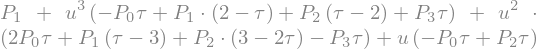

In [47]:
c0 = p1
c1 = -tao * p0 + tao * p2
c2 = 2 * tao * p0 + (tao - 3) * p1 + (3 - 2 * tao) * p2 - tao * p3
c3 = -tao * p0 + (2 - tao) * p1 + (tao - 2) * p2 + tao * p3
p = c0 + c1 * u + c2 * u**2 + c3 * u**3

display(p)

在$P_1$和$P_2$处插入一个点$P_x$，得到另外一组公式

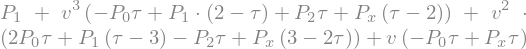

In [48]:
d0 = p1
d1 = -tao * p0 + tao * px
d2 = 2 * tao * p0 + (tao - 3) * p1 + (3 - 2 * tao) * px - tao * p2
d3 = -tao * p0 + (2 - tao) * p1 + (tao - 2) * px + tao * p2
q = d0 + d1 * u + d2 * u**2 + d3 * u**3
q = q.subs(u, v)

display(q)

如果要保证$P_1P_x$与原始的$P_1P_2$完全一致, 则有如下关系

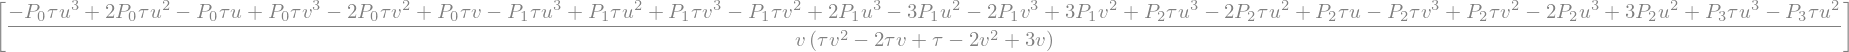

In [49]:
eqn = Eq(p, q)
ret = solve(p - q, px)
display(ret)

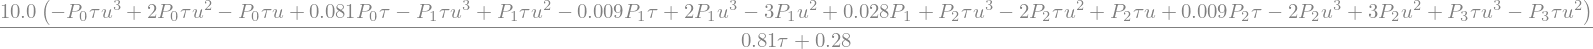

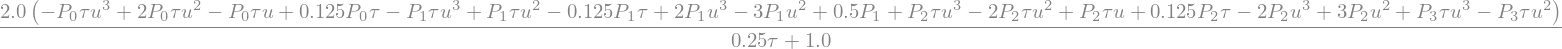

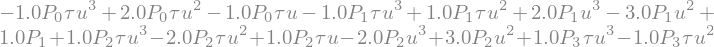

In [50]:
display(ret[0].subs(v, 0.1))

display(ret[0].subs(v, 0.5))

display(ret[0].subs(v, 1.0))

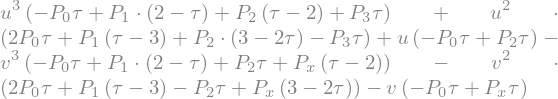

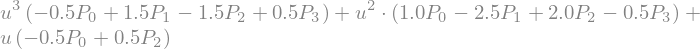

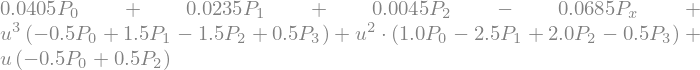

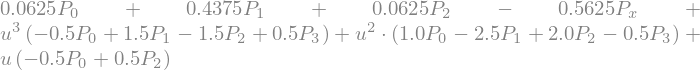

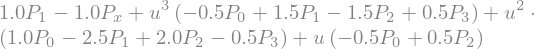

In [51]:
eq = p - q
display(eq)

eq1 = eq.subs(tao, 0.5).subs(v, 0)
display(collect(eq1, u))

eq1a = eq.subs(tao, 0.5).subs(v, 0.1)
display(collect(eq1a, u))

eq2 = eq.subs(tao, 0.5).subs(v, 0.5)
display(collect(eq2, u))

eq3 = eq.subs(tao, 0.5).subs(v, 1.0)
display(collect(eq3, u))